# Coda Waves Quality Factor #

VenKateshwaran B

The baseline correction was corrected, then a 3% cosine taper window was used to avoid Gibbs phenomenon
at two cutoff edges of signal.

## Butterworth-BandPass-Filter

Each waveform was narrow-band filtered using four-pole Butterworth band-pass filter with seven central
frequencies of 1.5, 3, 4.5, 6, 9, 12, and 18 HZ.

In [3]:
import warnings

import numpy as np
from scipy.fftpack import hilbert
from scipy.signal import (cheb2ord, cheby2, convolve, get_window, iirfilter,
                          remez)

try:
    from scipy.signal import sosfilt
    from scipy.signal import zpk2sos
except ImportError:
    from ._sosfilt import _sosfilt as sosfilt
    from ._sosfilt import _zpk2sos as zpk2sos


def bandpass(data, freqmin, freqmax, df, corners=4, zerophase=False):
    """
    Butterworth-Bandpass Filter.
    Filter data from ``freqmin`` to ``freqmax`` using ``corners``
    corners.
    The filter uses :func:`scipy.signal.iirfilter` (for design)
    and :func:`scipy.signal.sosfilt` (for applying the filter).
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freqmin: Pass band low corner frequency.
    :param freqmax: Pass band high corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the filter order but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    low = freqmin / fe
    high = freqmax / fe
    # raise for some bad scenarios
    if high - 1.0 > -1e-6:
        msg = ("Selected high corner frequency ({}) of bandpass is at or "
               "above Nyquist ({}). Applying a high-pass instead.").format(
            freqmax, fe)
        warnings.warn(msg)
        return highpass(data, freq=freqmin, df=df, corners=corners,
                        zerophase=zerophase)
    if low > 1:
        msg = "Selected low corner frequency is above Nyquist."
        raise ValueError(msg)
    z, p, k = iirfilter(corners, [low, high], btype='band',
                        ftype='butter', output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)

## Data set loading

In [4]:
X = np.loadtxt("F:/update/VENKEY/venkey/EQ(1)/HYGH06U2(1).txt", dtype=float)
print(X)
print(len(X))

[-22.67333528 -22.67651153 -22.67714678 ... -22.68413452 -22.68032302
 -22.69683952]
12000


In [5]:
y = np.arange(0, 120, 0.01)
print(y)

[0.0000e+00 1.0000e-02 2.0000e-02 ... 1.1997e+02 1.1998e+02 1.1999e+02]


## Central Frequencies

In [6]:
cf1 = bandpass(X, 1.5, 3, 120, corners=4, zerophase=False)
cf2 = bandpass(X, 3, 6, 120, corners=4, zerophase=False)
cf3 = bandpass(X, 6, 9, 120, corners=4, zerophase=False)
cf4 = bandpass(X, 9, 12, 120, corners=4, zerophase=False)
cf5 = bandpass(X, 12, 18, 120, corners=4, zerophase=False)

In [7]:
import matplotlib.pyplot as plt

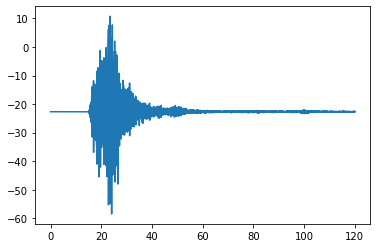

In [8]:
plt.plot(y, X)

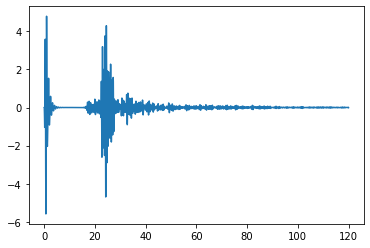

In [9]:
plt.plot(y, cf1)

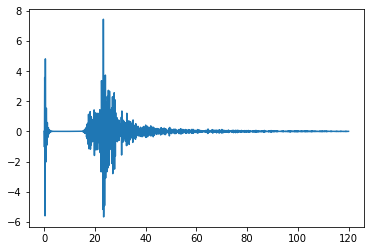

In [10]:
plt.plot(y, cf2)

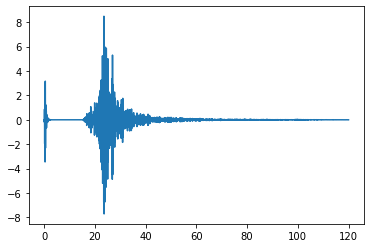

In [11]:
plt.plot(y, cf3)

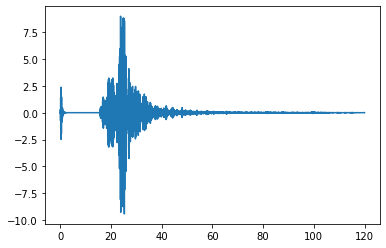

In [12]:
plt.plot(y, cf4)

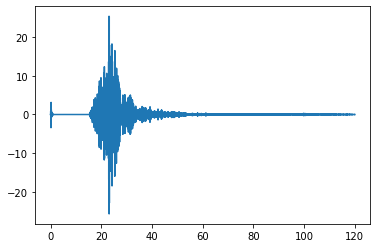

In [13]:
plt.plot(y, cf5)

## Coda Wave Envelop

The following equation is used to obtain coda wave envelop.

$$ A(f,t) = \sqrt{x(f,t_l)^2 + H[x(f,t_l)]} $$

Where, $ x $ is filtered seismogram with central frequency $ f $ and lapse time $ t_l $, and $ H $ is Hilbert transform function

In [14]:
from scipy.signal import hilbert
import math

In [15]:
#coda waves envelop
central_freq = 4.5 #[3-6 frequency]
sur_waves = 20.48
coda_waves = 38.77 
k = X[3877:3877 + 500]
lapse_time = [10, 20, 30, 40, 50, 60, 70, 80, 90]
for roll in lapse_time:
    if roll == 10:
        K1 = cf2[3877:3877+1000];
        L1 = y[3877:3877+1000];
        [t, p] = [[np.power(K1, 2)], [np.power(L1, 2)]]
        N = hilbert([K1, L1]);
        [N1, N2] = np.power(N, 2)
        A1 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 20:
        K2 = cf2[3877+500:3877+2000];
        L2 = y[3877+500:3877+2000];
        [t, p] = [[np.power(K2, 2)], [np.power(L2, 2)]]
        N = hilbert([K2, L2]);
        [N1, N2] = np.power(N, 2)
        A2 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 30:
        K3 = cf2[3877+1000:3877+3000];
        L3 = y[3877+1000:3877+3000];
        [t, p] = [[np.power(K3, 2)], [np.power(L3, 2)]]
        N = hilbert([K3, L3]);
        [N1, N2] = np.power(N, 2)
        A3 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 40:
        K4 = cf2[3877+1500:3877+4000];
        L4 = y[3877+1500:3877+4000];
        [t, p] = [[np.power(K4, 2)], [np.power(L4, 2)]]
        N = hilbert([K4, L4]);
        [N1, N2] = np.power(N, 2)
        A4 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 50:
        K5 = cf2[3877+2000:3877+5000];
        L5 = y[3877+2000:3877+5000];
        [t, p] = [[np.power(K5, 2)], [np.power(L5, 2)]]
        N = hilbert([K5, L5]);
        [N1, N2] = np.power(N, 2)
        A5 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 60:
        K6 = cf2[3877+2500:3877+6000];
        L6 = y[3877+2500:3877+6000];
        [t, p] = [[np.power(K6, 2)], [np.power(L6, 2)]]
        N = hilbert([K6, L6]);
        [N1, N2] = np.power(N, 2)
        A6 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 70:
        K7 = cf2[3877+3000:3877+7000];
        L7 = y[3877+3000:3877+7000];
        [t, p] = [[np.power(K7, 2)], [np.power(L7, 2)]]
        N = hilbert([K7, L7]);
        [N1, N2] = np.power(N, 2)
        A7 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 80:
        K8 = cf2[3877+3500:3877+8000];
        L8 = y[3877+3500:3877+8000];
        [t, p] = [[np.power(K8, 2)], [np.power(L8, 2)]]
        N = hilbert([K8, L8]);
        [N1, N2] = np.power(N, 2)
        A8 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    elif roll == 90:
        K9 = cf2[3877+4000:3877+9000];
        L9 = y[3877+4000:3877+9000];
        [t, p] = [[np.power(K9, 2)], [np.power(L9, 2)]]
        N = hilbert([K9, L9]);
        [N1, N2] = np.power(N, 2)
        A9 = [[np.sqrt(t + N1)], [np.sqrt(p + N2)]]
    else:
        print("Choosing the correct lapse time")
        

## Signal to Noise Ratio

#### ROOT MEAN SQUARE
A root mean square approach based on below equation is used to smooth the obtained coda envelop. In this approach,
a window sliding with 5 s-length and 1s intervals is considered, then root mean square of this window is
calculated and is attributed to the center of the window. 

$$ A_c(f, t_l) = rms(Coda  window) $$

#### SIGNAL TO NOISE  RATIO
Next, signal to noise ratio (SNR) of coda waves should be determined to select good quality coda wave. A 5-s
window length before the P-wave arrival time was considered as the noise window. The root mean square
(rms) of noise window was considered as noise amplitude (AN)

$$ A_N(f) = rms(Noise window) $$

Then, SNR was calculated using the following equation

$$ SNR(f, t_l) = \frac{A_c(f, t_l)} {A_N(f)} $$

In [16]:
#Finding Singnal To Noise Ratio
#Root Mean Square(RMS) window
[r1, c1] = [A1[0:500], A1[1:500]]
[r1, c1] = [np.sqrt(np.mean(np.power(r1, 2))), np.sqrt(np.mean(np.power(c1, 2)))]
[r2, c2] = [A2[0:500], A2[1:500]]
[r2, c2] = [np.sqrt(np.mean(np.power(r2, 2))), np.sqrt(np.mean(np.power(c2, 2)))]
[r3, c3] = [A3[0:500], A3[1:500]]
[r3, c3] = [np.sqrt(np.mean(np.power(r3, 2))), np.sqrt(np.mean(np.power(c3, 2)))]
[r4, c4] = [A4[0:500], A4[1:500]]
[r4, c4] = [np.sqrt(np.mean(np.power(r4, 2))), np.sqrt(np.mean(np.power(c4, 2)))]
[r5, c5] = [A5[0:500], A5[1:500]]
[r5, c5] = [np.sqrt(np.mean(np.power(r5, 2))), np.sqrt(np.mean(np.power(c5, 2)))]
[r6, c6] = [A6[0:500], A6[1:500]]
[r6, c6] = [np.sqrt(np.mean(np.power(r6, 2))), np.sqrt(np.mean(np.power(c6, 2)))]
[r7, c7] = [A7[0:500], A7[1:500]]
[r7, c7] = [np.sqrt(np.mean(np.power(r7, 2))), np.sqrt(np.mean(np.power(c7, 2)))]
[r8, c8] = [A8[0:500], A8[1:500]]
[r8, c8] = [np.sqrt(np.mean(np.power(r8, 2))), np.sqrt(np.mean(np.power(c8, 2)))]
[r9, c9] = [A9[0:500], A9[1:500]]
[r9, c9] = [np.sqrt(np.mean(np.power(r9, 2))), np.sqrt(np.mean(np.power(c9, 2)))]

#Noise Window
n_fre = y[1496-500:1496];
nf = np.sqrt(np.mean(np.power(n_fre, 2)))
n_mag = cf2[1496-500:1496];
nm = np.sqrt(np.mean(np.power(n_mag, 2)))

SNR = np.divide([r1, c1], [nf, nm]);
print(SNR)
#plt.figure(1)
#plt.plot(r1, c1, 'r')

[3.49429441e+00-6.62245662e-18j 3.16364932e+05-5.99585202e-13j]


## Determine Coda Waves

Finally, each filtered seismogram was cut by selected time windows as defined in Table 1. It should be noted
that we considered only those $ A_c $ which satisfied the $ t_l > 2t_s $.

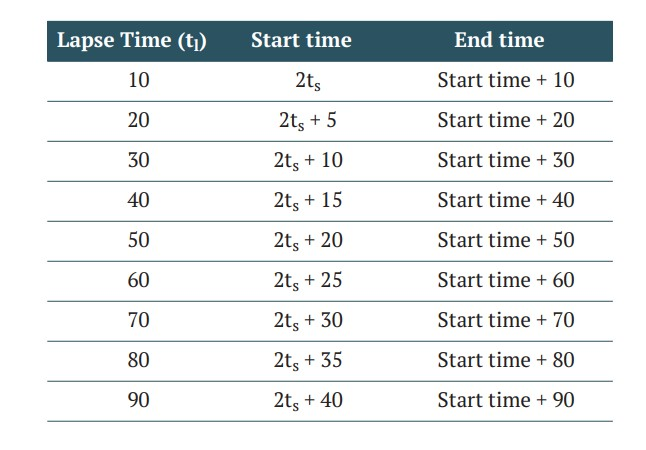

In [17]:
amp = []
#time = []
w1 = 0
w2 = 0
for mag in range(len(K1[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K1[w1:w2]))
z1 = [10 * num for num in amp]
amp = []
for mag in range(len(K2[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K2[w1:w2]))
z2 = [20 * num for num in amp]
amp = []
for mag in range(len(K3[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K3[w1:w2]))
z3 = [30 * num for num in amp]
amp = []
for mag in range(len(K4[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K4[w1:w2]))
z4 = [40 * num for num in amp]
amp = []
for mag in range(len(K5[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K5[w1:w2]))
z5 = [50 * num for num in amp]
amp = []
for mag in range(len(K6[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K6[w1:w2]))
z6 = [60 * num for num in amp]
amp = []
for mag in range(len(K7[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K7[w1:w2]))
z7 = [70 * num for num in amp]
amp = []
for mag in range(len(K8[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K8[w1:w2]))
z8 = [80 * num for num in amp]
amp = []
for mag in range(len(K9[0:-1:100])):
    if w1 != 0:
        w1 = w1 + 100
    w2 = w2 + 100
    amp.append(np.mean(K9[w1:w2]))
z9 = [90 * num for num in amp]

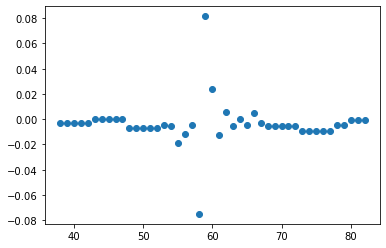

In [18]:
from itertools import zip_longest

tl = np.arange(38, 38 + 45, 1)


f1 = [x+y for x,y in zip_longest(reversed(z1), reversed(z2), fillvalue=0)]
f2 = [x+y for x,y in zip_longest(reversed(f1), reversed(z3), fillvalue=0)]
f3 = [x+y for x,y in zip_longest(reversed(f2), reversed(z4), fillvalue=0)]
f4 = [x+y for x,y in zip_longest(reversed(f3), reversed(z5), fillvalue=0)]
f5 = [x+y for x,y in zip_longest(reversed(f4), reversed(z6), fillvalue=0)]
f6 = [x+y for x,y in zip_longest(reversed(f5), reversed(z7), fillvalue=0)]
f7 = [x+y for x,y in zip_longest(reversed(f6), reversed(z8), fillvalue=0)]
f8 = [x+y for x,y in zip_longest(reversed(f7), reversed(z9), fillvalue=0)]

plt.scatter(tl, f8)

## Single Backscattering Model

In this research, the single backscattering model [Aki and Chouet, 1975] has been used to estimate the coda
wave attenuation of 9100 local earthquakes. In this method, it is assumed that source and receiver are at the same
point and scattering is a weak process that does not produce any secondary scattering. According to this model, the
decay rate of root mean square (RMS) amplitude of coda wave A(f,t) for a central frequency of f at lapse time tl is
defined as the following:

$$ A(f,t) = C(f) t_l^\alpha \exp{(\frac{-\pi f t_l}{Q_c})} $$

Where C(f), α, and Qc are the source factor, geometrical spreading (α=1 for body wave), and the coda quality
factor, respectively. If natural logarithm is taken from both sides of above equation, it becomes:

$$ \ln[A(f,t_l)t_l] = c - bt_l $$

Where $ c = \ln C(f) $ and $ b = \frac{\pi f}{Q_c}$ . For estimation of Qc value at each selected lapse time, a straight line is fitted to the $ \ln[A(f,t_l)t_l] $. 

The slope of that line (b) gives quality factor value at a central frequency f.

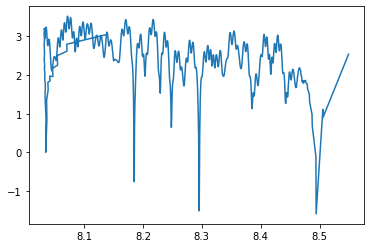

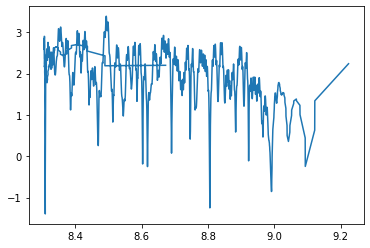

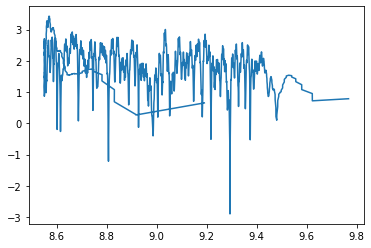

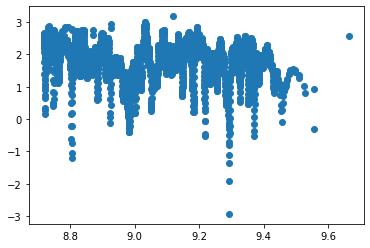

In [19]:
K = cf2[3877:3877+1000];
L = y[3877:3877+1000];
t = np.abs(np.power(K, 2))
p = np.abs(np.power(L, 2))
N1 = np.abs(np.power(hilbert(K), 2))
N2 = np.abs(np.power(hilbert(L), 2))
A11 = np.sqrt(t + N1)
A12 = np.sqrt(p + N2)
qc = np.log(np.multiply([A11, A12], A12))
plt.figure(1)
plt.plot(qc[1], qc[0])

K = cf2[3877+500:3877+2500];
L = y[3877+500:3877+2500];
t = np.abs(np.power(K, 2))
p = np.abs(np.power(L, 2))
N1 = np.abs(np.power(hilbert(K), 2))
N2 = np.abs(np.power(hilbert(L), 2))
A11 = np.sqrt(t + N1)
A12 = np.sqrt(p + N2)
qc = np.log(np.multiply([A11, A12], A12))
plt.figure(2)
plt.plot(qc[1], qc[0])

K = cf2[3877+1000:3877+4000];
L = y[3877+1000:3877+4000];
t = np.abs(np.power(K, 2))
p = np.abs(np.power(L, 2))
N1 = np.abs(np.power(hilbert(K), 2))
N2 = np.abs(np.power(hilbert(L), 2))
A11 = np.sqrt(t + N1)
A12 = np.sqrt(p + N2)
qc = np.log(np.multiply([A11, A12], A12))
plt.figure(3)
plt.plot(qc[1], qc[0])

K = cf2[3877+1500:3877+4000];
L = y[3877+1500:3877+4000];
t = np.abs(np.power(K, 2))
p = np.abs(np.power(L, 2))
N1 = np.abs(np.power(hilbert(K), 2))
N2 = np.abs(np.power(hilbert(L), 2))
A11 = np.sqrt(t + N1)
A12 = np.sqrt(p + N2)
qc = np.log(np.multiply([A11, A12], A12))
plt.figure(4)
plt.scatter(qc[1], qc[0])

## Linear Regression

Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


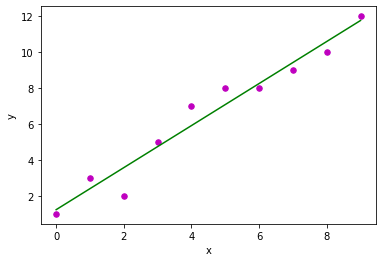

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = z1
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()

## Reference

1. Rouhollah Amiri Fard, Gholam Javan-Doloei, Mohsen Farrokhi, Habib Rahimi, Majid Mahood, "Coda wave attenuation's dependency on Lapse time and frequency in west of Iran plateau using local earthquakes", ANNALS OF GEOPHYSICS, 63, 4, SE437, 2020; doi:10.4401/ag-8165